In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


### Loading Data

In [2]:
# import from sklearn datasets
# https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html

# from sklearn.datasets import load_iris
# iris_data = load_iris()

# columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
# features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# target = ['Species']

# X = pd.DataFrame(iris_data.data, columns=features)
# y = pd.DataFrame(iris_data.target, columns=target)

In [3]:
# load from file

# https://archive.ics.uci.edu/dataset/53/iris

file_path = '../input/iris/Iris.csv'
iris_data = pd.read_csv(file_path, index_col='Id')

# iris_data.isnull().sum().sum() # = 0 missing values

In [4]:
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

target = ['Species']

labels_prefixed = iris_data.Species.unique()
labels = [str(i).removeprefix('Iris-') for i in labels_prefixed]
labels

['setosa', 'versicolor', 'virginica']

In [6]:
iris_setosa = iris_data[iris_data.Species == "Iris-setosa"]
iris_setosa.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_versicolor = iris_data[iris_data.Species == "Iris-versicolor"]
iris_versicolor.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor


In [8]:
iris_virginica = iris_data[iris_data.Species == "Iris-virginica"]
iris_virginica.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
101,6.3,3.3,6.0,2.5,Iris-virginica
102,5.8,2.7,5.1,1.9,Iris-virginica
103,7.1,3.0,5.9,2.1,Iris-virginica
104,6.3,2.9,5.6,1.8,Iris-virginica
105,6.5,3.0,5.8,2.2,Iris-virginica


### Apply Ordinal Encoding to Y

In [9]:
ordinal_encoder = OrdinalEncoder() # Your code here
y = ordinal_encoder.fit_transform(iris_data[target])
iris_data.Species = y

iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0.0
2,4.9,3.0,1.4,0.2,0.0
3,4.7,3.2,1.3,0.2,0.0
4,4.6,3.1,1.5,0.2,0.0
5,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2.0
147,6.3,2.5,5.0,1.9,2.0
148,6.5,3.0,5.2,2.0,2.0


### Plotting features SepalLengthCm and SepalWidthCm

[Inspired from Documentation](https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html/)


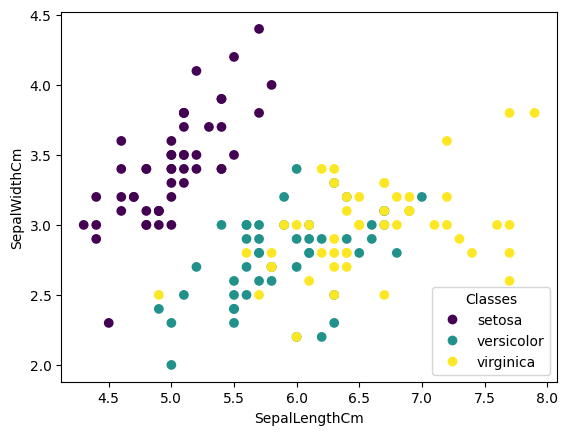

In [10]:
# https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html

_, ax = plt.subplots()
scatter = ax.scatter(data=iris_data, x=features[0], y=features[1], c=iris_data['Species'])
ax.set(xlabel=features[0], ylabel=features[1])
_ = ax.legend(
    scatter.legend_elements()[0], labels, loc="lower right", title="Classes"
)


### Plotting features PetalLengthCm and PetalWidthCm

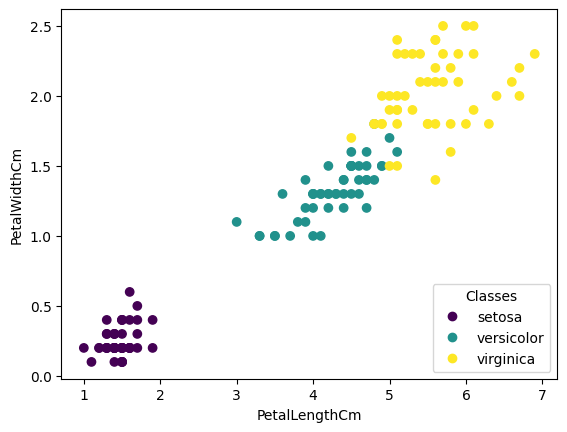

In [11]:
_, ax = plt.subplots()

scatter = ax.scatter(data=iris_data, x=features[2], y=features[3], c=iris_data['Species'])
ax.set(xlabel=features[2], ylabel=features[3])
_ = ax.legend(
    scatter.legend_elements()[0], labels, loc="lower right", title="Classes"
)

### Train-Test Split

In [12]:
y = iris_data.Species 

X = iris_data[features] # iris_data.drop(columns="Species")

# # Split into validation and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

### Classifiers to Use

In [13]:
classifiers = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
#     "Logistic Regression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
}

### Loop to iterate fit, predict, evaluate and plot

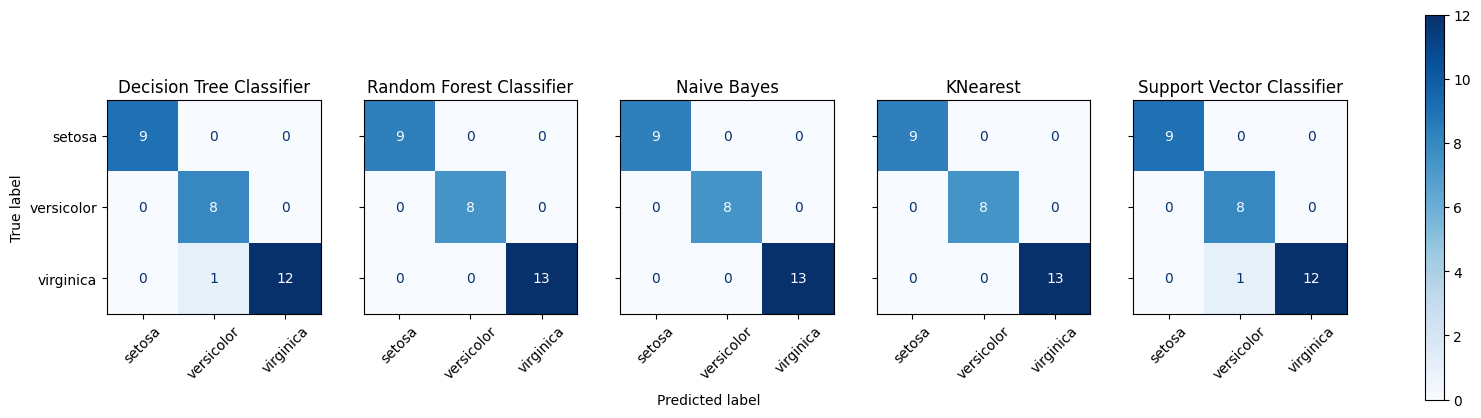

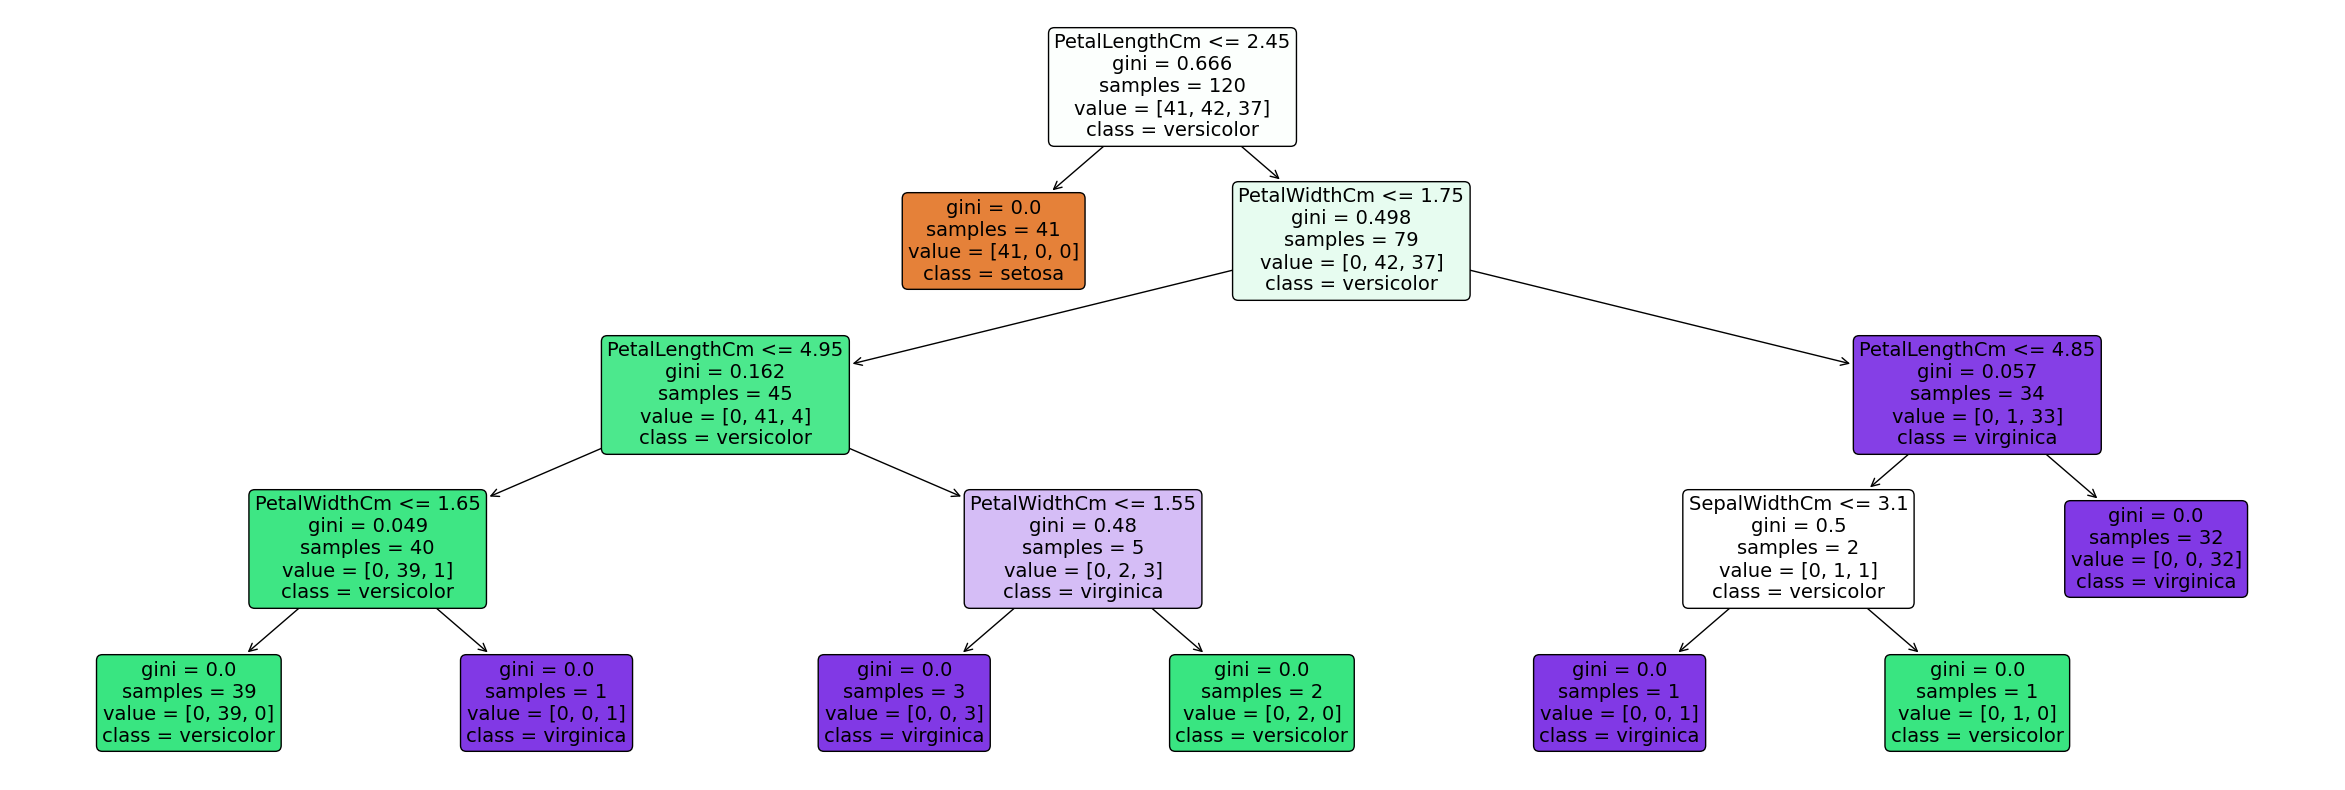

In [14]:
metrics = []



f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=labels)
    disp.plot(ax=axes[i], xticks_rotation=45, cmap=plt.cm.Blues, values_format='g')
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

    if i!=0:
        disp.ax_.set_ylabel('')
    
    # Decision Tree for DecisionTreeClassifier()
    if i==0:
        plt.figure(figsize=(30,10))
        a = tree.plot_tree(classifier,
                   feature_names = features,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
        
    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    metrics.append(f"""{key}, {accuracy*100:.1f}% accuracy\n
    Confusion Matrix:\n {cf_matrix} \n
    Classification Report:\n {class_report} \n
    """)
        
f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()

In [15]:
for metric in metrics:
    print(metric)

Decision Tree Classifier, 96.7% accuracy

    Confusion Matrix:
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]] 

    Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       0.89      1.00      0.94         8
         2.0       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30
 

    
Random Forest Classifier, 100.0% accuracy

    Confusion Matrix:
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  0 13]] 

    Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.